Источник: <a href='https://habr.com/ru/articles/324736/'>Геометрия машинного обучения. Разделяющие гиперплоскости или в чём геометрический смысл линейной комбинации?</a>

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Разделяющая гиперплоскость

Уравнение разделяющей гиперплоскости:
$w_1 x_1 + w_2 x_2 + b = 0 $

Альтернативные способы записи:
$w_1 x_1 + w_2 x_2 + ... + w_n x_n + b = 0 $

или:

$\sum_{i = 1}^{n}{w_ix_i}+b=0 $

или:

$w^Tx+b=0 $


Вектор $w$ является нормалью к разделяющей гиперплоскости.


In [122]:
w = [1.5, 3.5]
x = [0.3, 0.2]

In [123]:
b = - np.dot(w, x)
b

-1.15

Гиперплоскость делит гиперпространство на два гиперподпространства. Так вот точки, находящиеся в одном из этих подпространств (условно говоря «выше» гиперплоскости), и точки, находящиеся в другом из этих подпространств (условно говоря «ниже» гиперплоскости), будут в этой сумме давать разный знак:

$w^T x + b > 0$ — точка лежит «выше» гиперплоскости

$w^T x + b < 0$ — точка лежит «ниже» гиперплоскости

С геометрической точки зрения направление «выше» для данной конкретной линии определяется вектором нормали. Куда смотрит нормаль, там и верх.

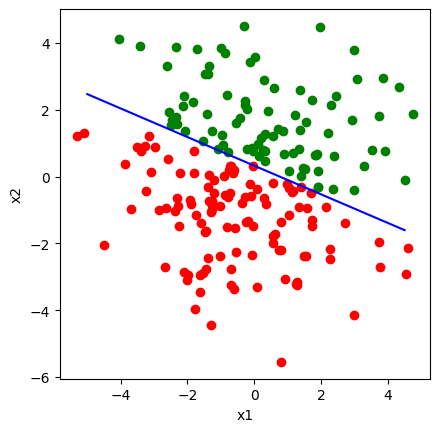

In [124]:
# наша линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return w[0] * x1 + w[1] * x2 + b

# служебная функция в форме x2 = f(x1) (для наглядности)
def line_x1(x1):
    return (w[0] * x1 + b) / - w[1]

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    if (value == 0): # синие — на линии
        plt.plot(x1, x2, 'ro', color='blue')
    elif (value > 0): # зелёные — выше линии
        plt.plot(x1, x2, 'ro', color='green')
    elif (value < 0): # красные — ниже линии
        plt.plot(x1, x2, 'ro', color='red')

# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

Чем дальше от плоскости находится точка, тем больше будет значение линейной комбинации для неё. Если зафиксировать значение линейной комбинации, получим точки, лежащие на прямой, параллельной исходной.

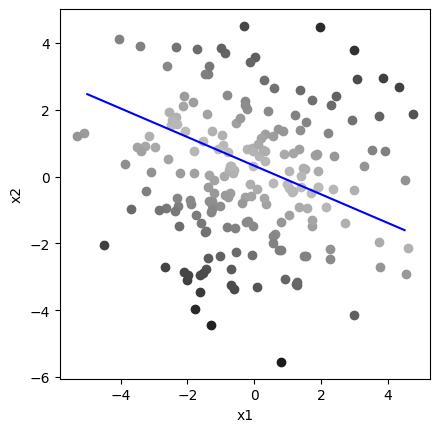

In [125]:
# наша линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return w[0] * x1 + w[1] * x2 + b

# служебная функция в форме x2 = f(x1) (для наглядности)
def line_x1(x1):
    return (w[0] * x1 + b) / - w[1]

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    # цвет тем тенее, чем меньше значение — поэтому минус
    # коэффициенты — чтобы попасть в диапазон [0, 0.75]
    # чёрный (0) — самые удалённые точки, светло-серый (0.75) — самые близкие
    color = str(max(0, 0.75 - np.abs(value) / 30))

    plt.plot(x1, x2, 'ro', color=color)

# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

## Сигмоидная функция активации

$ σ(x) = \frac{1}{1 + e^{-x}}$

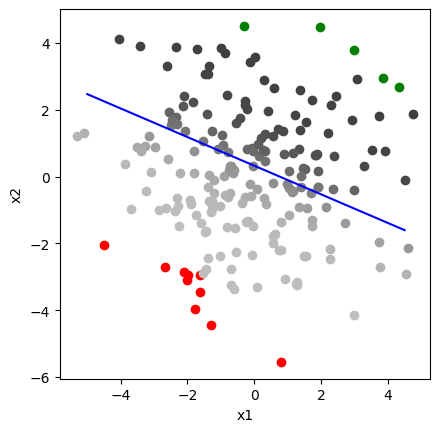

In [126]:
# логистическая функция
def logit(x):
    return 1 / (1 + np.exp(-x))

# наша линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return w[0] * x1 + w[1] * x2 + b

# служебная функция в форме x2 = f(x1) (для наглядности)
def line_x1(x1):
    return (w[0] * x1 + b) / - w[1]

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:
    # деление добавляется для наглядности — эдакая ручная нормализация
    value = logit(line(x1, x2) / 2)

    if (value < 0.001):
        color = 'red'
    elif (value > 0.999):
        color = 'green'
    else:
        color = str(0.75 - value * 0.5)

    plt.plot(x1, x2, 'ro', color=color)

# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

Красные — точно нет (false, точно брак, точно не кликнет). Зелёные — точно да (true, точно годится, точно кликнет). Всё, что в определённом диапазоне близости от гиперплоскости (граница решений) получает некоторую вероятность. На самой прямой вероятность ровно 0.5.

P.S. «Точно» здесь определяется как меньше 0.001 или больше 0.999. Сама логистическая функция стремится к нулю на минус бесконечности и к единице на плюс бесконечности, но никогда этих значений не принимает.

N.B. Обратите внимание, что данный пример лишь демонстрирует каким образом можно ужать (squashing) расстояние со знаком в интервал вероятностей $(0, 1)$. В практических задачах для поиска оптимального отображения используется калибровка вероятностей. Например, в алгоритме шкалирования по Платту (Platt scaling) логистическая функция параметризуется:

$f(x) = \frac{1}{1 + e^{Ax + B}}$



и затем коэффициенты $A$ и $B$ подбираются машинным обучением. Подробнее смотрите: binary classifier calibration, probability calibration.